### IMPORTS

In [1]:
from Inference import BBVI 

In [2]:
import torch
import matplotlib.pyplot as plt

### EXAMPLE

In [3]:
# Find what device to work with
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
# load data and make it in proper shape
data = torch.load('data/foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [22]:
# Creating and initializing the BBVI-NeuralNet. This object if a distribution over Neural Networks, 
#it has parameters, it can be sampled, we can measure the log probabilities, etc.
Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=15, nb_layers=3, device=device)

In [23]:
# Choice of optimizer: Adam is the one working best so far. This is the underlying optimizer
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.1}

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 5, 'factor': 0.7}

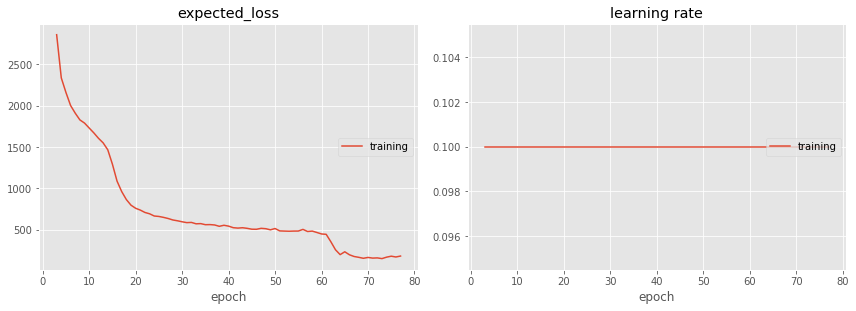

expected_loss:
training   (min:  149.740, max: 53240.828, cur:  180.702)

learning rate:
training   (min:    0.100, max:    0.100, cur:    0.100)


KeyboardInterrupt: 

In [24]:
# Making the "meta" optimizer. Defining the noise level of the data and setting the ending learning rate when changes are no longer significant
voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params, min_lr=0.00001)
Net = voptimizer.run((x_data,y_data), n_epoch=10000, n_iter=50, n_ELBO_samples=20, plot=True)

In [25]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)

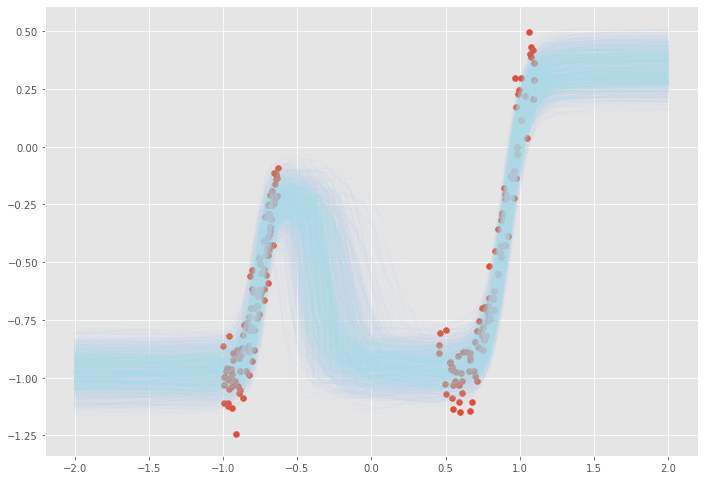

In [26]:
# Sampling the distribution over Neural Networks 1000 times, and plotting with transparency to make it appear as a smooth distribution
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.sample_parameters()

    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')